In [7]:
%matplotlib inline
import json
import urllib
import pathlib
from pprint import pprint

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
from tqdm import tqdm

In [19]:
raw_dir = pathlib.Path('./raw/')
json_paths = list(raw_dir.glob('*.json'))

df = pd.DataFrame()
for path in tqdm(json_paths):
    with path.open() as f:
        data = json.load(f)
    df = df.append(data, ignore_index=True)
df['site'] = df['url'].map(lambda url: urllib.parse.urlparse(url).netloc)

100%|██████████| 2655/2655 [00:09<00:00, 272.60it/s]


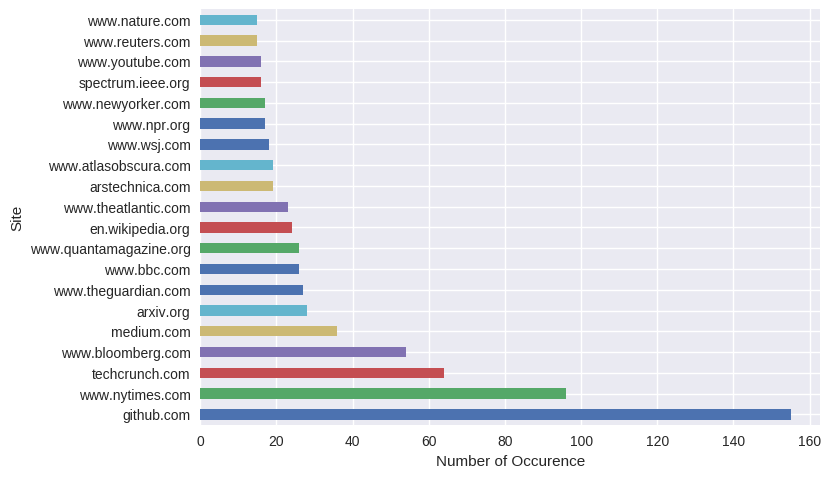

In [27]:
res = df['site'].value_counts()
fig, ax = plt.subplots(dpi=100)
ax.set_xlabel('Number of Occurence')
ax.set_ylabel('Site')
res.head(20).plot(kind='barh', ax=ax)
plt.show()

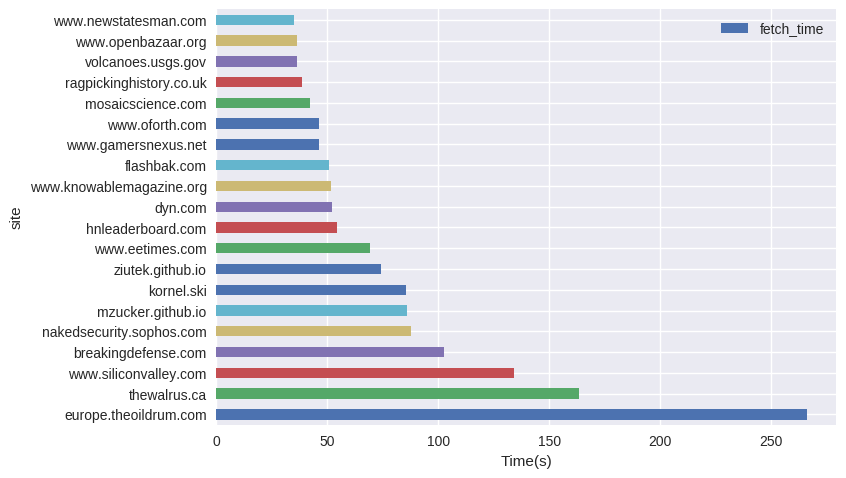

In [31]:
fig, ax = plt.subplots(dpi=100)
res = df.groupby('site').mean().sort_values('fetch_time', ascending=False)
res.head(20).plot(kind='barh', y='fetch_time', ax=ax)
ax.set_xlabel('Time(s)')
plt.show()

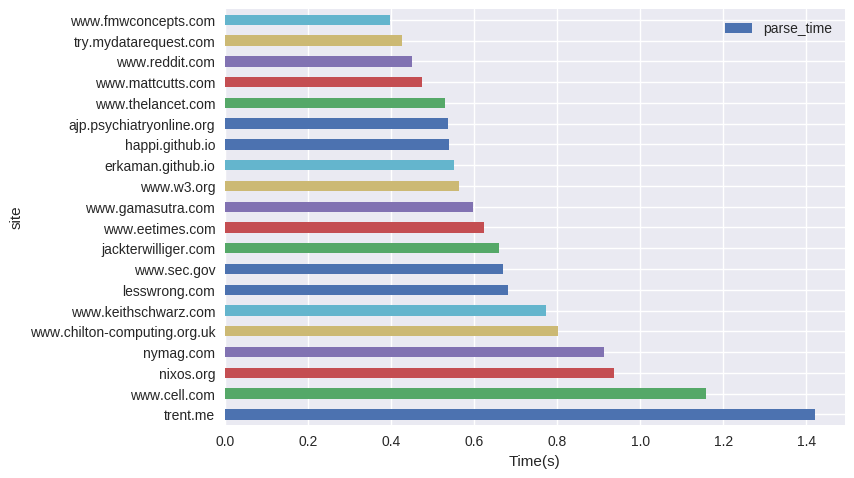

In [30]:
fig, ax = plt.subplots(dpi=100)
res = df.groupby('site').mean().sort_values('parse_time', ascending=False)
res.head(20).plot(kind='barh', y='parse_time', ax=ax)
ax.set_xlabel('Time(s)')
plt.show()